In [150]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('horm_sort.csv')

In [5]:
print(df.shape)
df.head()

(156, 60)


,Subjects,Time,Type,Testosterone,Cortisol,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,MR01,0,0,12.00,303.60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MR02,0,0,15.70,394.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MR03,0,0,16.50,560.30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MR04,0,0,14.60,601.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MR05,0,0,28.70,532.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
print(df.shape)
df.head()

(156, 5)


,Subjects,Time,Type,Testosterone,Cortisol
0,MR01,0,0,12.00,303.60
1,MR02,0,0,15.70,394.70
2,MR03,0,0,16.50,560.30
3,MR04,0,0,14.60,601.70
4,MR05,0,0,28.70,532.70


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Subjects      156 non-null    object
 1   Time          156 non-null    int64 
 2   Type          156 non-null    int64 
 3   Testosterone  156 non-null    object
 4   Cortisol      156 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.2+ KB


In [8]:
df['Testosterone']= pd.to_numeric(df['Testosterone'], errors='coerce')
df['Cortisol']= pd.to_numeric(df['Cortisol'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Subjects      156 non-null    object 
 1   Time          156 non-null    int64  
 2   Type          156 non-null    int64  
 3   Testosterone  154 non-null    float64
 4   Cortisol      154 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 6.2+ KB


## Type - Condition (0 - Placebo, 1 -Testosterone), T0 - baseline, T1 - after 3-4 hours

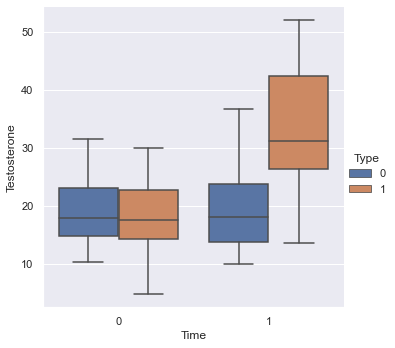

In [9]:
sns.catplot(x="Time", y="Testosterone", hue="Type", kind="box", data=df);

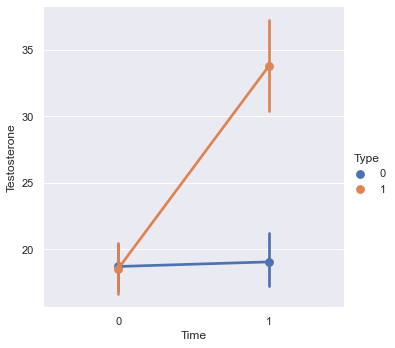

In [10]:
sns.catplot(x="Time", y="Testosterone", hue="Type", kind="point", data=df);

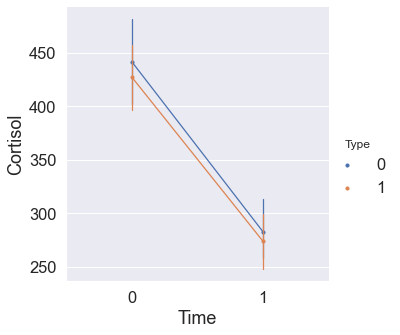

In [126]:
sns.catplot(x="Time", y="Cortisol", hue="Type", kind="point",linewidth=.7, alpha=.75, data=df);

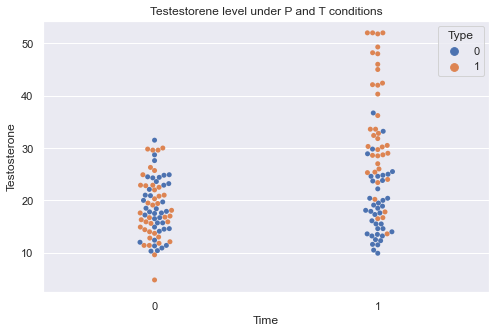

In [14]:
plt.figure(figsize=(8,5))
g = sns.swarmplot(y='Testosterone', x='Time', hue='Type', 
                  data=df).set_title('Testestorene level under P and T conditions')

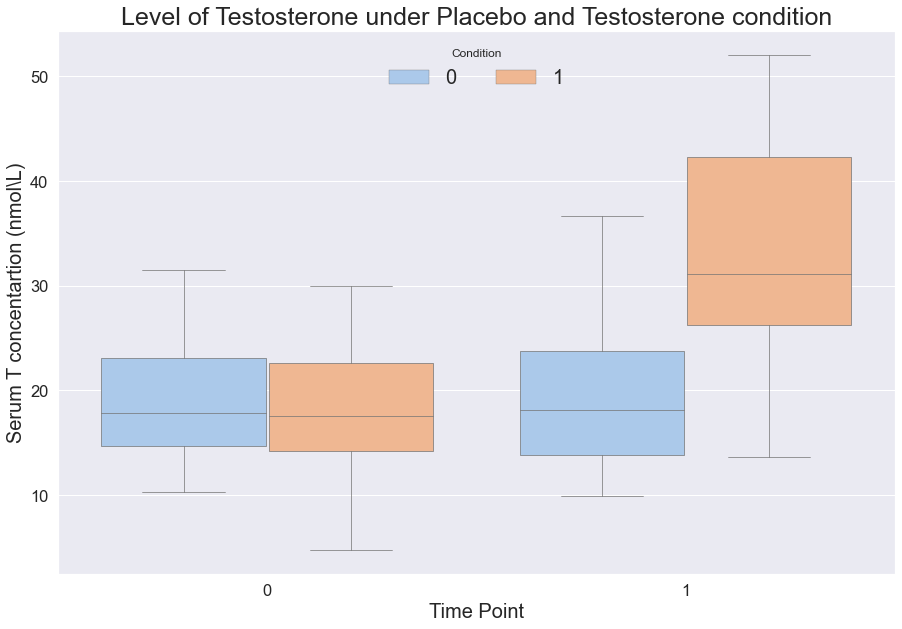

In [155]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 0.7})
plt.figure(figsize=(15,10))
g = sns.boxplot(x="Time", y="Testosterone",
            hue="Type", palette="pastel", data=df)
plt.title('Level of Testosterone under Placebo and Testosterone condition', fontsize=25)
# Set x-axis label
plt.xlabel('Time Point', fontsize=20)
# Set y-axis label
plt.ylabel('Serum T concentartion (nmol\L)', fontsize=20)
# Set legend label
plt.legend(title="Condition",prop={"size":20},frameon=False, loc='upper center', ncol=2);
#How to change legend from 0 and 1 to P and T???



Text(0, 0.5, 'Serum T concentartion (nmol\\L)')

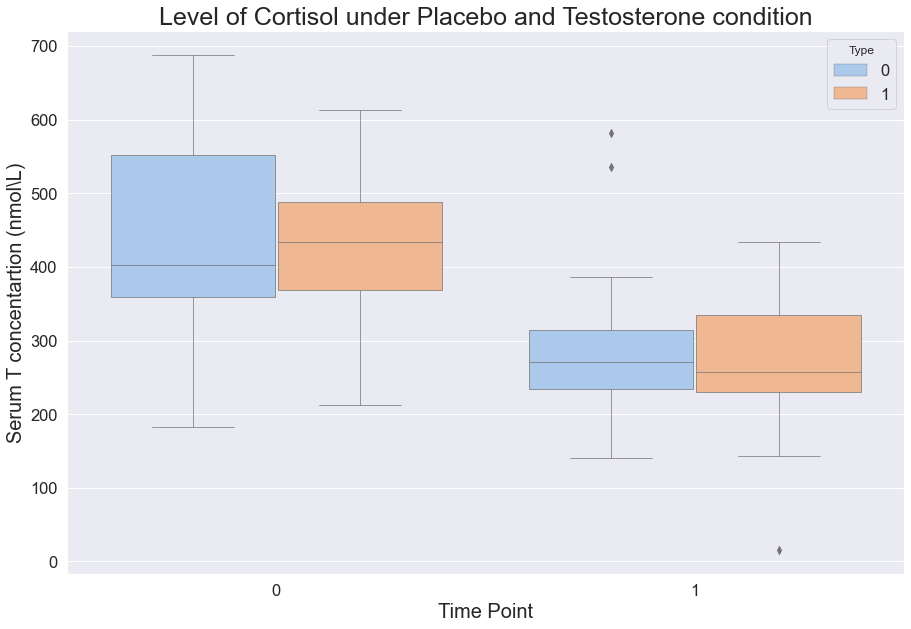

In [87]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 0.7})
plt.figure(figsize=(15,10))
sns.boxplot(x="Time", y="Cortisol",
            hue="Type", palette="pastel", data=df)
plt.title('Level of Cortisol under Placebo and Testosterone condition', fontsize=25)
# Set x-axis label
plt.xlabel('Time Point', fontsize=20)
# Set y-axis label
plt.ylabel('Serum T concentartion (nmol\L)', fontsize=20)

<Figure size 1800x1440 with 0 Axes>

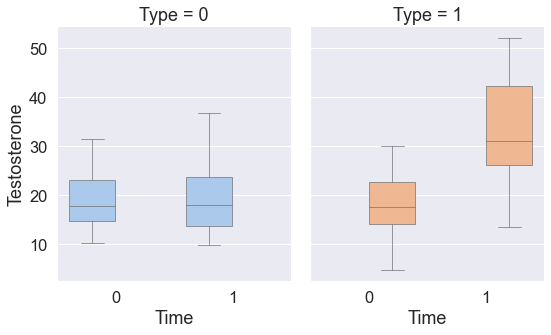

In [83]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 0.7})
plt.figure(figsize=(25,20))
sns.catplot(x="Time", y="Testosterone",
            hue="Type",col="Type", aspect=.8, palette="pastel",kind="box", data=df)


<Figure size 1800x1440 with 0 Axes>

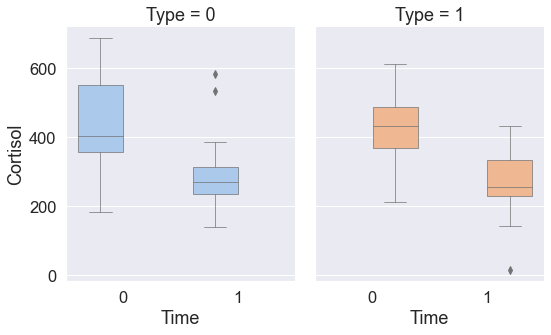

In [84]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 0.7})
plt.figure(figsize=(25,20))
sns.catplot(x="Time", y="Cortisol",
            hue="Type",col="Type", aspect=.8, palette="pastel",kind="box", data=df)

Text(0, 0.5, 'Serum T concentartion (nmol\\L)')

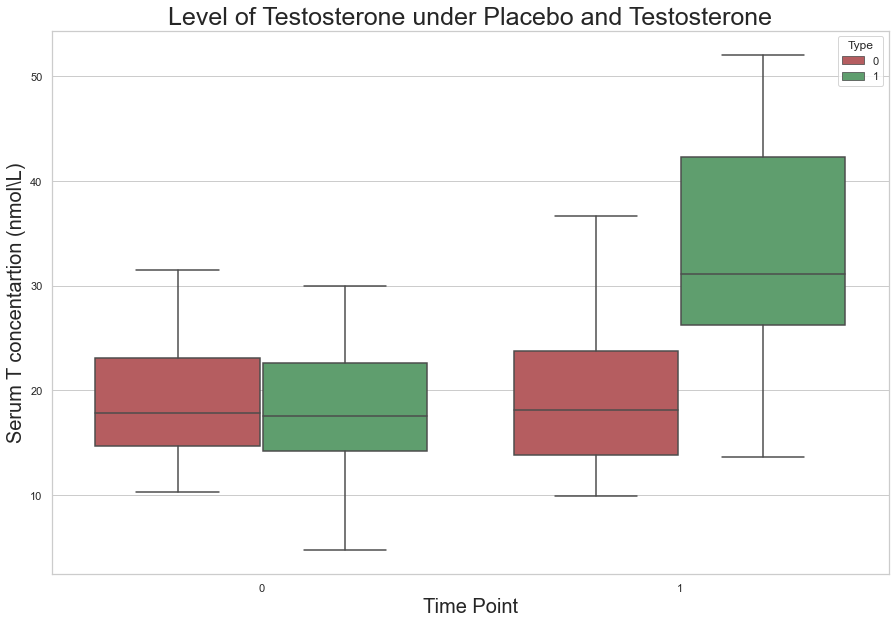

In [58]:

plt.figure(figsize=(15,10))
sns.boxplot(x="Time", y="Testosterone",
            hue="Type", palette=["r", "g"], data=df)
plt.title('Level of Testosterone under Placebo and Testosterone', fontsize=25)
# Set x-axis label
plt.xlabel('Time Point', fontsize=20)
# Set y-axis label
plt.ylabel('Serum T concentartion (nmol\L)', fontsize=20)


Text(0, 0.5, 'Serum T concentartion (nmol\\L)')

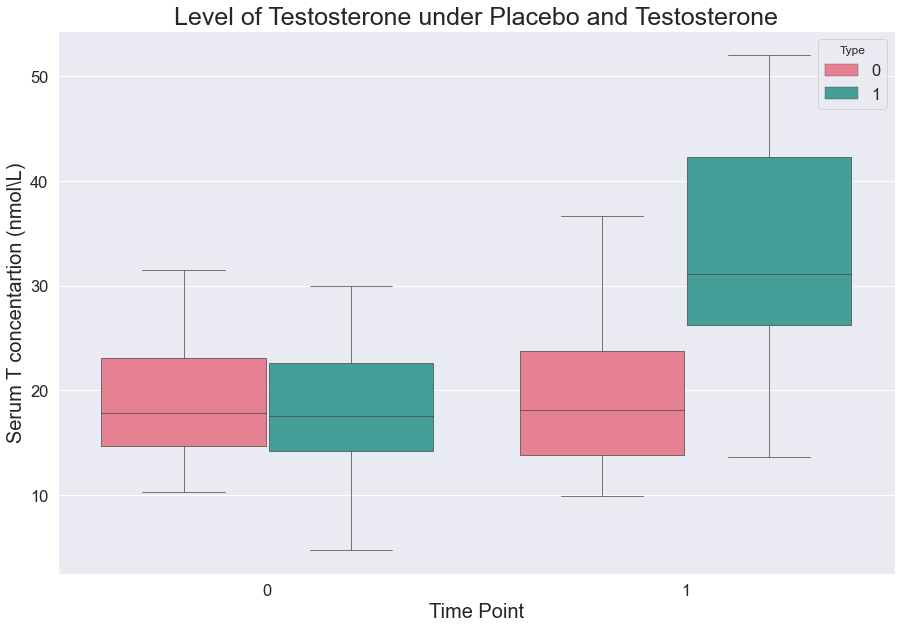

In [70]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Time", y="Testosterone",
            hue="Type", palette= 'husl' , data=df)
plt.title('Level of Testosterone under Placebo and Testosterone', fontsize=25)
# Set x-axis label
plt.xlabel('Time Point', fontsize=20)
# Set y-axis label
plt.ylabel('Serum T concentartion (nmol\L)', fontsize=20)

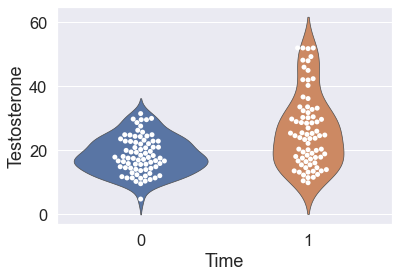

In [99]:
g = sns.violinplot(x="Time", y="Testosterone", data=df, inner=None);
g = sns.swarmplot(x="Time", y="Testosterone",data=df,color="white", edgecolor="gray");

<Figure size 1080x720 with 0 Axes>

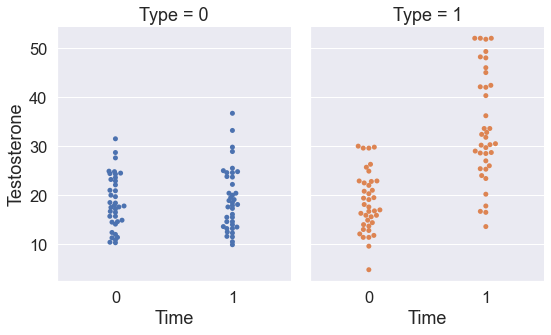

In [77]:
plt.figure(figsize=(15,10))
sns.catplot(x="Time", y="Testosterone", hue="Type",
            col="Type", aspect=.8,
            kind="swarm", data=df);


AttributeError: 'PathCollection' object has no property 'col'

<Figure size 1800x1440 with 0 Axes>

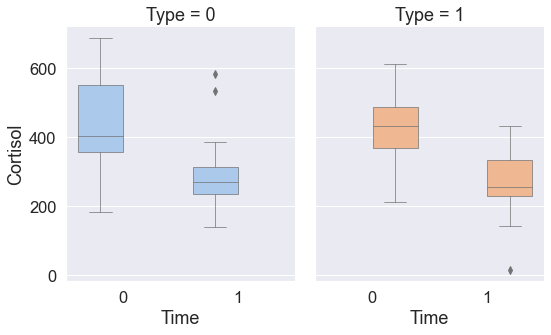

In [140]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 0.7})
plt.figure(figsize=(25,20))
ax =sns.catplot(x="Time", y="Cortisol",
            hue="Type",col="Type", aspect=.8, palette="pastel",kind="box", data=df)
ax = sns.swarmplot(x="Time", y="Cortisol",
            hue="Type",col="Type",data=df)